Daniel Velasquez

In [1]:
import pandas as pd
import sklearn 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

--2023-02-24 13:49:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203415 (199K) [application/x-httpd-php]
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z 100%[===================>] 198.65K   297KB/s    in 0.7s    

2023-02-24 13:49:57 (297 KB/s) - ‘smsspamcollection.zip’ saved [203415/203415]



In [3]:
!unzip smsspamcollection.zip

Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


In [4]:
df = pd.read_csv('/content/SMSSpamCollection', header=None, delimiter='\t')

In [5]:
df.columns = ["clase", "texto"]

In [6]:
df

,clase,texto
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df["clase"].value_counts()

ham     4825
spam     747
Name: clase, dtype: int64

## Vectorizer

In [8]:
vectorizer3 = CountVectorizer()

In [9]:
vector = df.to_numpy()

In [10]:
vector

array([['ham',
        'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       ['ham', 'Ok lar... Joking wif u oni...'],
       ['spam',
        "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       ...,
       ['ham',
        'Pity, * was in mood for that. So...any other suggestions?'],
       ['ham',
        "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"],
       ['ham', 'Rofl. Its true to its name']], dtype=object)

In [11]:
vectorizer3.fit(df["texto"])

CountVectorizer()

In [12]:
vectorizer3.vocabulary_

{'go': 3571,
 'until': 8084,
 'jurong': 4374,
 'point': 5958,
 'crazy': 2338,
 'available': 1316,
 'only': 5571,
 'in': 4114,
 'bugis': 1767,
 'great': 3655,
 'world': 8548,
 'la': 4501,
 'buffet': 1765,
 'cine': 2061,
 'there': 7694,
 'got': 3615,
 'amore': 1082,
 'wat': 8324,
 'ok': 5538,
 'lar': 4537,
 'joking': 4342,
 'wif': 8450,
 'oni': 5567,
 'free': 3373,
 'entry': 2963,
 'wkly': 8506,
 'comp': 2178,
 'to': 7806,
 'win': 8463,
 'fa': 3100,
 'cup': 2398,
 'final': 3221,
 'tkts': 7793,
 '21st': 412,
 'may': 4959,
 '2005': 403,
 'text': 7644,
 '87121': 794,
 'receive': 6340,
 'question': 6232,
 'std': 7279,
 'txt': 7986,
 'rate': 6284,
 'apply': 1169,
 '08452810075over18': 77,
 'dun': 2815,
 'say': 6679,
 'so': 7074,
 'early': 2836,
 'hor': 3952,
 'already': 1054,
 'then': 7688,
 'nah': 5270,
 'don': 2724,
 'think': 7709,
 'he': 3805,
 'goes': 3579,
 'usf': 8130,
 'lives': 4692,
 'around': 1220,
 'here': 3856,
 'though': 7729,
 'freemsg': 3380,
 'hey': 3866,
 'darling': 2455,
 'it

In [13]:
vec_vectorizer = vectorizer3.transform(df["texto"]).toarray()

In [14]:
vec_vectorizer

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## TFIDF

In [15]:
tfifd2 = TfidfVectorizer()

In [16]:
tfifd2.fit(df["texto"])

TfidfVectorizer()

In [17]:
tfifd2.vocabulary_

{'go': 3571,
 'until': 8084,
 'jurong': 4374,
 'point': 5958,
 'crazy': 2338,
 'available': 1316,
 'only': 5571,
 'in': 4114,
 'bugis': 1767,
 'great': 3655,
 'world': 8548,
 'la': 4501,
 'buffet': 1765,
 'cine': 2061,
 'there': 7694,
 'got': 3615,
 'amore': 1082,
 'wat': 8324,
 'ok': 5538,
 'lar': 4537,
 'joking': 4342,
 'wif': 8450,
 'oni': 5567,
 'free': 3373,
 'entry': 2963,
 'wkly': 8506,
 'comp': 2178,
 'to': 7806,
 'win': 8463,
 'fa': 3100,
 'cup': 2398,
 'final': 3221,
 'tkts': 7793,
 '21st': 412,
 'may': 4959,
 '2005': 403,
 'text': 7644,
 '87121': 794,
 'receive': 6340,
 'question': 6232,
 'std': 7279,
 'txt': 7986,
 'rate': 6284,
 'apply': 1169,
 '08452810075over18': 77,
 'dun': 2815,
 'say': 6679,
 'so': 7074,
 'early': 2836,
 'hor': 3952,
 'already': 1054,
 'then': 7688,
 'nah': 5270,
 'don': 2724,
 'think': 7709,
 'he': 3805,
 'goes': 3579,
 'usf': 8130,
 'lives': 4692,
 'around': 1220,
 'here': 3856,
 'though': 7729,
 'freemsg': 3380,
 'hey': 3866,
 'darling': 2455,
 'it

In [18]:
vec_tfidf = tfifd2.transform(df["texto"]).toarray()

In [19]:
vec_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Modelo con KNN


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
model = KNeighborsRegressor(n_neighbors=10)

In [23]:
X=vec_tfidf
y=df["clase"]
model.fit(X,y)

KNeighborsRegressor(n_neighbors=10)

In [24]:
modelo = DecisionTreeClassifier()
modelo.fit(X,y)

DecisionTreeClassifier()

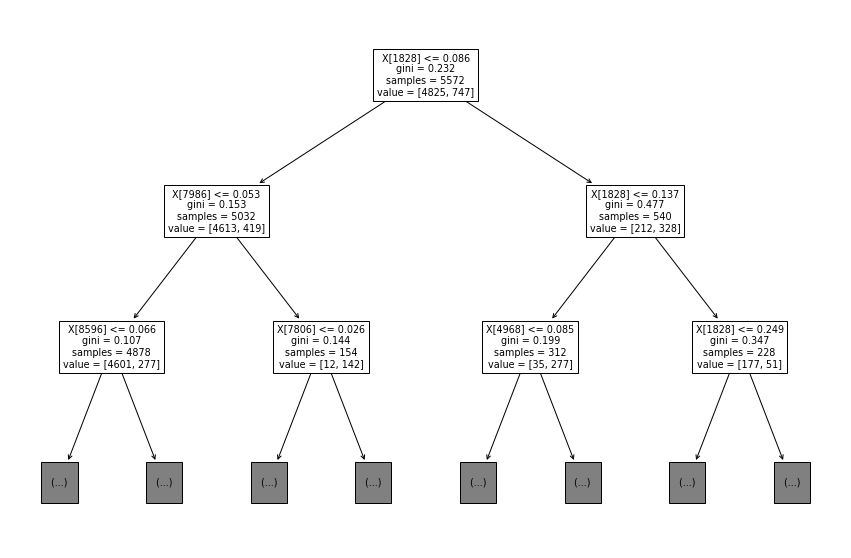

In [25]:
plt.figure(figsize=(15,10))
#plot_tree(modelo,feature_names=modelo.feature_names_in_,class_names=["0", "1"])
plot_tree(modelo, max_depth = 2)
plt.show()

In [26]:
modelo.predict(tfifd2.transform(["Will ü b going to esplanade fr home?"]).toarray())

array(['ham'], dtype=object)

### Con CrossValidation

In [27]:
kf_cv = KFold(n_splits=10, shuffle=False)
r2 = cross_validate(DecisionTreeClassifier(max_depth=10),
                   #df["texto"],
                   vec_tfidf,
                   df["clase"],
                   #cv = 4,
                   cv = kf_cv.split(df),
                   return_estimator = True,
                   scoring = ["accuracy"],
                   return_train_score = True)

In [28]:
r2

{'fit_time': array([5.01523542, 4.40899444, 4.73927212, 4.43854523, 4.34869504,
        4.84930134, 4.32354093, 4.37190008, 4.81040025, 4.42609811]),
 'score_time': array([0.01429558, 0.0142169 , 0.01808667, 0.01089478, 0.01095462,
        0.01074481, 0.01078248, 0.01514196, 0.0109601 , 0.01107645]),
 'estimator': [DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10),
  DecisionTreeClassifier(max_depth=10)],
 'test_accuracy': array([0.96774194, 0.96774194, 0.96947935, 0.96409336, 0.96409336,
        0.98384201, 0.95870736, 0.95332136, 0.96229803, 0.96947935]),
 'train_accuracy': array([0.98284803, 0.98205026, 0.98344965, 0.98045862, 0.98225324,
        0.98205384, 0.98085743, 0.98325025,

In [29]:
r2['test_accuracy']

array([0.96774194, 0.96774194, 0.96947935, 0.96409336, 0.96409336,
       0.98384201, 0.95870736, 0.95332136, 0.96229803, 0.96947935])

Arboles

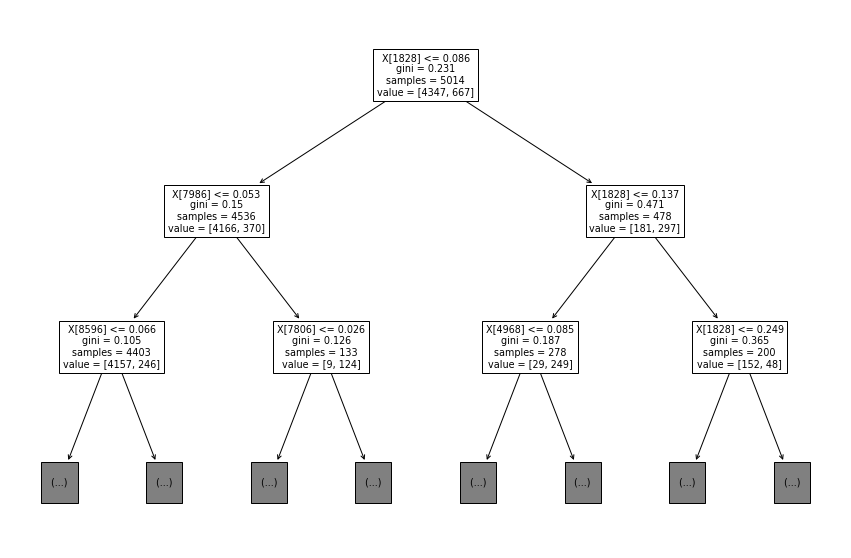

In [30]:
plt.figure(figsize=(15,10))
plot_tree(r2['estimator'][0], max_depth=2)
plt.show()